In [93]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from Bio import SeqIO

In [94]:
G = nx.DiGraph()
G_dict = {}


In [95]:
def combiner(string1,string2):
    ol_letters ,max_ol = "" ,0
    
    if len(string1) < len(string2):
        shorter = string1
        longer = string2
    elif len(string1) > len(string2):
        shorter = string2
        longer = string1
    else:
        shorter = string1
        longer = string2
        
    for i in range(len(longer)):
        #shorter's suffix to longer's prefix
        if i <= len(shorter):
            #checks if suffix of shorter overlaps with prefix of longer and records the longest overlap
            #print(shorter[len(shorter)-i:],longer[:i],sep='_')
            if shorter[-i:] == longer[:i]:
                if len(longer[:i]) > len(ol_letters):
                    ol_letters  = longer[:i]
                    max_ol = len(ol_letters)
        #sees if anything in longer matches up with shorter
        if i + len(shorter) <= len(longer) + 1:
            #print(shorter,longer[i:len(shorter) - 1 + i],sep= '*')
            if shorter == longer[i:len(shorter) - 1 + i]:
                if len(longer[:i]) > len(ol_letters):
                    ol_letters = longer[i:len(shorter) - 1 + i]
                    max_ol = len(ol_letters)
        #shorter's prefix to longer's suffix
        if i <= len(shorter):
            #sees if anything in longer matches up with shorter
            # print(shorter[:i],longer[len(longer)-i:],sep='|')
            if shorter[:i] == longer[-i:]:
                if len(shorter[:i]) > len(ol_letters):
                    ol_letters =  longer[len(longer)-i:]
                    max_ol = len(ol_letters)

    
    
    marker = longer.find(ol_letters)
    if marker > len(shorter):
        
        #print("test1")
        return longer, max_ol
    elif max_ol > 0:
        if len(shorter) == len(longer):
            #print("test2")
            #shorter's prefix to longer's suffix
            if shorter[:max_ol] == longer[len(longer)-max_ol:]:
                return longer + shorter[max_ol:] , max_ol
            #shorter's suffix to longer's prefix
            elif shorter[len(shorter)-max_ol:] == longer[:max_ol]:
                return shorter + longer[max_ol:], max_ol
        #prefix of one equals suffix for one character then combined at that point
        elif max_ol == 1:
            #print("test3")
            #shorter's prefix to longer's suffix
            if shorter[:1] == longer[-1:]:
                return  longer + shorter[1:], max_ol
            #shorter's suffix to longer's prefix
            elif shorter[-1:] == longer[:1]:
                return shorter + longer[1:], max_ol
        #if shorter is part of a substring of longer,the overlapping region of substring longer is spliced and the remainder is added
        #to shorter or longer depending on the overlap
        else:
            #print("test4")
            
            #shorter's prefix to longer's suffix
            if shorter[:max_ol] == longer[len(longer) - max_ol:]:
                return longer + shorter[max_ol:], max_ol
            #shorter's suffix to longer's prefix
            if shorter[len(shorter) - max_ol:] == longer[:max_ol]:
                return shorter + longer[max_ol:], max_ol
    elif max_ol == 0:
        #print("test5")
        return shorter + longer, max_ol
    


In [96]:
def greedy_graph(arr):
    
    #print(len(arr))
    G.add_node(arr[0])
    if len(arr) == 1:
        return arr[0]
    
    for j in range(1,len(arr)):
        string_overlap = combiner(arr[0],arr[j])
        #string = string_overlap[0]
        overlap = string_overlap[1]
       
        
        if overlap > 0:
            G.add_node(arr[j])
            G.add_edge(arr[0], arr[j], weight=overlap)
            
            
            
    
    arr.pop(0)
    return greedy_graph(arr)



In [97]:
def reader(file,limit):
    reads = []
    cnt = 0
    #note you only get half of the reads in limit
    with open(file,"r") as f:
        while True:
            cnt += 1
            line = f.readline().strip("\n")
            if cnt%2 == 0 and "N" not in line:
                reads.append(line)
            if cnt == limit:
                break
            if not line:
                break
    return reads



In [98]:
def one_fasta(file):
    for seq_record in SeqIO.parse(file,"fasta"):
        return str(seq_record.seq)

DiGraph with 13 nodes and 58 edges


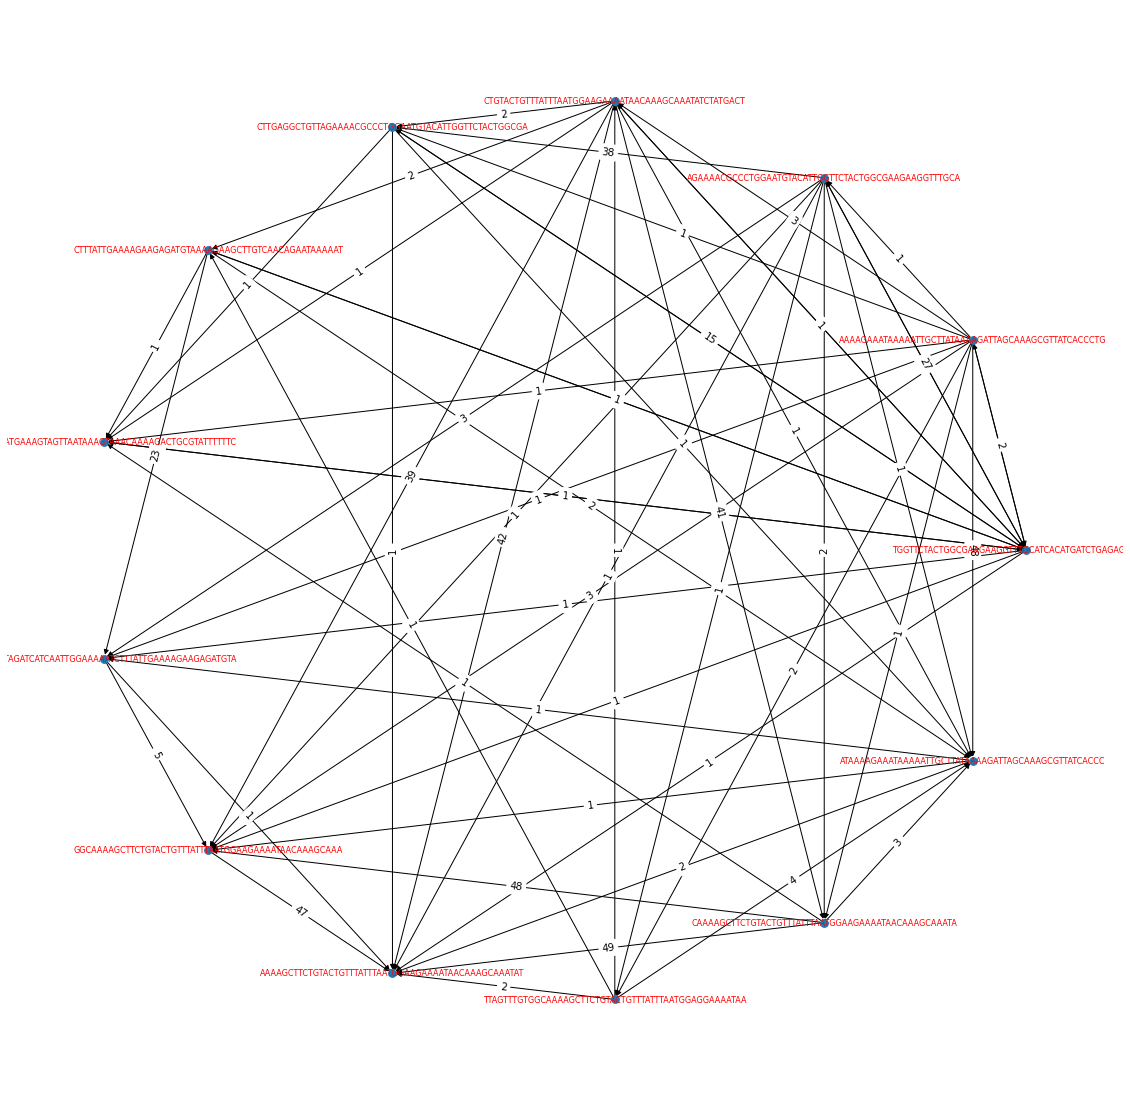

In [99]:
#string1 = "gctaagttcatgcatc"
#arr = ["catg", "ctaagt", "gcta","atgcatc" ,"ttca"]

reads = reader("Mycoplasma genitalium reads.fasta",1000)
random_reads = random.choices(reads,k = 15)
#print([i for i in random_reads])
greedy_graph(random_reads)

print(G)
pos=nx.circular_layout(G)
labels = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(20,20)) 
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
nx.draw(G, pos , with_labels = True,node_size=60,font_size=8,font_color = 'red')
plt.savefig('graph.png')